# Section3 - Quantum Protocols & Algorithms

https://qiskit.org/textbook/ch-algorithms/defining-quantum-circuits.html

###### Quantum teleportation

In [5]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector

# 3 qubits e 2 bits clássicos em 2 diferentes registradores
qr = QuantumRegister(3)
cr1 = ClassicalRegister(1)
cr2 = ClassicalRegister(1)
teleportation_circuit = QuantumCircuit(qr,cr1,cr2)

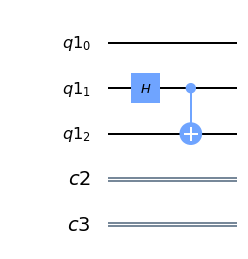

In [6]:
# Alice q0 e q1
# Bob q2
# emaranhando q1 e q2
def create_bell_pair(qc, a, b):
    qc.h(a)
    qc.cx(a,b)
    
create_bell_pair(teleportation_circuit,1,2)
teleportation_circuit.draw('mpl')

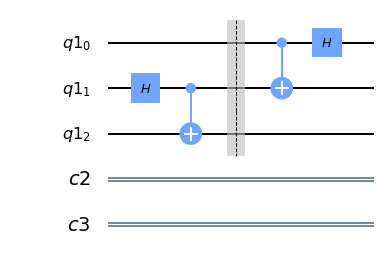

In [7]:
# Alice quer enviar q0 para Bob
def alice_gates(qc,psi,a):
    qc.cx(psi,a)
    qc.h(psi)
    
teleportation_circuit.barrier()
alice_gates(teleportation_circuit,0,1)
teleportation_circuit.draw('mpl')

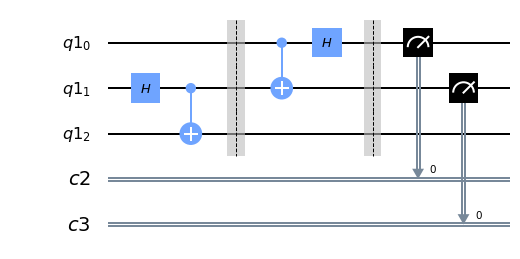

In [8]:
# Alice mede ambos qubits que possui (q0 e q1) e armazena nos bits clássicos
# Logo após enviar para Bob
def measure_send(qc,a,b):
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)
    
measure_send(teleportation_circuit,0,1)
teleportation_circuit.draw('mpl')

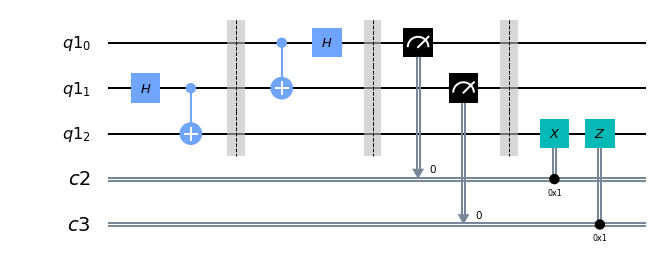

In [9]:
# Bob possui q2 e aplica as seguintes operações de acordo com os bits recebidos
# 00 - nada
# 01 - aplica X gate
# 10 - aplica Z gate
# 11 - aplica ZX gate
def bob_gates(qc, qubit, cr1, cr2):
    # c_if é usado para controlar os bits clássicos
    # aplica tal gate se o bit clássico for 1
    qc.x(qubit).c_if(cr1,1)
    qc.z(qubit).c_if(cr2,1)
    
teleportation_circuit.barrier()
bob_gates(teleportation_circuit,2,cr1,cr2)
teleportation_circuit.draw('mpl')